## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [145]:
# Importing needed Lib
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

# Have Look on Data:

##### Read in the dataset ` ab_data.csv` and take a look at the top few rows here

In [146]:
df=pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

##### Find the number of rows in the dataset.

In [147]:
np.shape(df)[0]

294478

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


##### The number of unique users in the dataset.

In [149]:
len(df.user_id.unique())

290584

##### The proportion of users converted.

In [150]:
user_conv=len( df[df['converted'] == 1])/len(df)
user_conv                                                                                    

0.11965919355605512

##### The number of times the new_page and treatment don't match.

In [151]:
df1=df[ (df['group'] == 'control') & (df['landing_page'] == 'new_page') ]
len(df1)
df2= df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
len(df2)+len(df1)

3893

##### Do any of the rows have missing values?

In [152]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

# Getting Data Ready:

##### Remove the rows where `treatment` doesn't match with `new_page` or `control` doesn't match with `old_page` then save cleand DataFrame in to `df2`

In [153]:
df2=df.query('group == "control" and landing_page == "old_page"')
df3=df.query('group == "treatment" and landing_page == "new_page" ')
df2=df2.merge(df3,how='outer')
len(df)-(len(df2)+3893)


0

##### Double Check all of the correct rows were removed 
> `The Result of Next Cell should be 0`

In [154]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

a. How many unique **user_id**s are in **df2**?

In [155]:
len(df2.user_id.unique())

290584

##### There is one `user_id` repeated in `df2` What is it?

In [156]:
len(df2.user_id) - len(df2.user_id.unique())

1

In [157]:
df2[df2.user_id.duplicated()==True].user_id

146678    773192
Name: user_id, dtype: int64

##### What is the row information for the repeat user_id?

In [158]:
df2[df2.user_id.duplicated()==True]

user_id                   timestamp      group landing_page  converted
146678   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

##### Remove one of the rows with a duplicate `user_id`, but keep your dataframe as `df2`

In [159]:
df2.drop(index=146678,inplace=True)

##### Check That No Duplicated `user_id` in `df2`
> `The Result of Next Cell should be 0`

In [160]:
df2.user_id.duplicated().sum()

0

**What is the probability of an individual converting regardless of the page they receive?**

In [161]:
len(df2[df2['converted']==1])/len(df2)

0.11959708724499628

In [162]:
a=np.random.binomial(1,.12,len(df2))
(a==1).mean()

0.1201442612119043

In [163]:
a=np.random.binomial(1,.12,1000000)
(a==1).mean()

0.11996999999999999

**Given that an individual was in the control group, what is the probability they converted?**



In [164]:
len(df2[(df2['converted']==1) & (df2['group'] == 'control') ])/len(df2[df2['group'] == 'control'])

0.1203863045004612

**Given that an individual was in the treatment group, what is the probability they converted?**

In [165]:
len(df2[(df2['converted']==1) & (df2['group'] == 'treatment') ])/len(df2[df2['group'] == 'treatment'])

0.11880806551510564

**What is the probability that an individual received the new page?**



In [166]:
len(df2.query('group == "treatment"'))/len(df2)

0.5000619442226688

In [167]:
len(df2[df2['group'] == 'treatment'])

145310

In [168]:
len(df2[df2['group'] == 'control'])

145274

**Write down the conclusion from the output**

as sample size of treatment and control are nearly the same, then we are out of simpson's paradox and can assure that conversion for old page is slightly better but i think we can not see this slight difference as practical significance

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

# AB Testing:

Assume under the null hypothesis,  𝑝𝑛𝑒𝑤 & 𝑝𝑜𝑙𝑑  both have "true" success rates `equal to the converted success rate regardless of page`
> That is  𝑝𝑛𝑒𝑤 & 𝑝𝑜𝑙𝑑 are equal. Furthermore, **assume they are equal to the converted rate in ab_data.csv regardless of the page.**

**Write The Hypothesis below:**
1. $H_{0}$ : Pnew <= Pold  
  "Or" pnew - pold <= 0
2. $H_{1}$ : Pnew > Pold   
  "Or" pnew - pold > 0

##### What is the conversion rate 𝑝𝑛𝑒𝑤  `under the null`?

In [169]:
pnew = len(df2[df2['converted']==1])/len(df2)
pnew

0.11959708724499628

##### What is the conversion rate 𝑝𝑜𝑙𝑑  `under the null`?

In [170]:
pold=pnew
pold

0.11959708724499628

##### What is  `𝑛𝑛𝑒𝑤` , the number of individuals in the treatment group?

In [171]:
nnew=df2.query('group == "treatment" ').shape[0]
nnew

145310

##### What is  `𝑛𝑜𝑙𝑑`, the number of individuals in the control group?

In [172]:
nold=df2.query('group == "control" ').shape[0]
nold

145274

##### Simulate  `𝑛𝑛𝑒𝑤`  transactions with a conversion rate of  `𝑝𝑛𝑒𝑤`  under the null. 
> Store these  𝑛𝑛𝑒𝑤  1's and 0's in `new_page_converted`.

In [173]:
new_page_converted=np.random.choice([1,0],p=[pnew,1-pnew],size=nnew)

##### Simulate  `𝑛𝑜𝑙𝑑`  transactions with a conversion rate of  `𝑝𝑜𝑙𝑑`  under the null. 
> Store these  𝑛𝑜𝑙𝑑  1's and 0's in `old_page_converted`.

In [174]:
old_page_converted=np.random.choice([1,0],p=[pold,1-pold],size=nold)

##### Create `10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑 ` values using the same simulation process you used above. 
> Store all 10,000 values in a `NumPy array` called `p_diffs`.

In [175]:
p_diffs=[]
for i in range(10000):
    new_page_converted=np.random.choice([1,0],p=[pnew,1-pnew],size=nnew)
    old_page_converted=np.random.choice([1,0],p=[pold,1-pold],size=nold)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
np.mean(p_diffs)

-1.5028293934190878e-05

##### Plot the Dist

(array([   25.,   128.,   588.,  1726.,  2758.,  2677.,  1513.,   485.,
           91.,     9.]),
 array([ -4.43445961e-03,  -3.53626896e-03,  -2.63807832e-03,
         -1.73988767e-03,  -8.41697027e-04,   5.64936182e-05,
          9.54684264e-04,   1.85287491e-03,   2.75106555e-03,
          3.64925620e-03,   4.54744685e-03]),
 <a list of 10 Patch objects>)

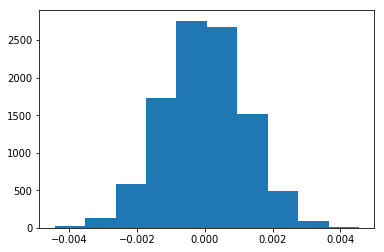

In [176]:
plt.hist(p_diffs)

##### Given that an individual was in the `control group`, what is the probability they `converted`?
> Save output in `p_cont`

In [177]:
p_cont=len(df2.query('group == "control" and converted == 1 '))/len(df2.query('group == "control" '))
p_cont

0.1203863045004612

##### Given that an individual was in the `treatment group`, what is the probability they `converted`?
> Save output in `p_treat`

In [178]:
p_treat=len(df2.query('group == "treatment" and converted == 1 '))/len(df2.query('group == "treatment" '))
p_treat

0.11880806551510564

##### Now Calculate `p_treat - p_cont` and save output in `acctual_diff`

In [179]:
acctual_diff = p_treat - p_cont
acctual_diff

-0.0015782389853555567

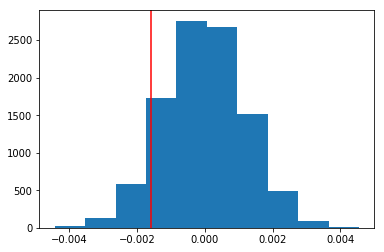

In [180]:
plt.hist(p_diffs)
plt.axvline(acctual_diff,color='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [181]:
p_value=(np.array(p_diffs)>acctual_diff).mean()
p_value

0.90559999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
##### This value called in scientific studies P_Value

##### From previous simulation and plots we found sample_statistic in plot range of NULL simulation and " < mean" and high P-value what satisfies perfectly NULL Hypothesis, Hence we can expect the same from simulating NULL Hypothesis with Normal dist using actual nearly p_cont, p_treat  

##### Simulating the Null Hypothesis with Normal dist using difference in actual conversion rates

In [182]:
diffs = []
for _ in range(1000):
    sample=df2.sample(len(df2),replace=True)
    control=sample.query('group == "control"')['converted'].mean()
    treat = sample.query('group == "treatment"')['converted'].mean()
    diffs.append(treat-control)
np.mean(diffs)

-0.0015637909715987052

In [183]:
np.std(diffs)

0.0011800351954198538

In [184]:
np.percentile(diffs,2.5),np.percentile(diffs,97.5)

(-0.0038336905736735499, 0.00082861631144602349)

##### Difference in means confidence interval is around zero so we can outweigh there is no difference "NULL Hypothesis"

(array([   1.,    8.,   21.,   90.,  189.,  257.,  230.,  139.,   44.,   21.]),
 array([-0.00603774, -0.00526098, -0.00448422, -0.00370745, -0.00293069,
        -0.00215393, -0.00137717, -0.00060041,  0.00017635,  0.00095311,
         0.00172988]),
 <a list of 10 Patch objects>)

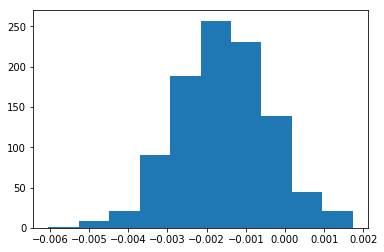

In [185]:
plt.hist(diffs)

Parameter is Normally distributed

In [186]:
nulls=np.random.normal(0,np.std(diffs),10000)

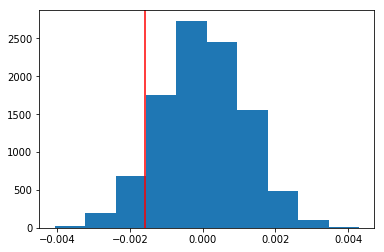

In [187]:
plt.hist(nulls)
plt.axvline(acctual_diff,color='r')

##### Calculating p-value:

In [188]:
p_val=(nulls>acctual_diff).mean()
p_val

0.91300000000000003

In [189]:
df.user_id=df.user_id.astype(str)
df.timestamp=pd.to_datetime(df.timestamp)
df.timestamp.max()-df.timestamp.min()

Timedelta('21 days 23:59:49.081927')

##### As expected, we got same results : neither statistical nor practical  significance for Alternative Hypothesis. Hence, to assure that NULL Hypothesis is true and recommend to keep old page ,or keep testing for more time as 21 days period for data collecting could represent change aversion as it's not enough time i think for people to be used to new page as familiar page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [191]:
convert_old =df2.query('landing_page == "old_page" and converted == 1 ').shape[0] 
convert_new = len(df2.query('landing_page == "new_page" and converted == 1 ')) 
n_old = len(df2.query('landing_page == "old_page"')) 
n_new = len(df2.query('landing_page == "new_page"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [192]:
import statsmodels.api as sm

In [193]:
stat, pval =sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],value=0,alternative='smaller')
stat,pval

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
Z-score of "1.31" means our sample statistic "acctual diff" lies (1.31 times of standard deviation) far from the mean of NULL normal dist, P-value is the probability of type| error if we assumed to apply Alternative Hypothesis given that NULL Hypothesis assumed to be true.
Yes, They agree with our calculations

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
  Logistic Regression Model 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [194]:
df2['intercept']=1
df2[['control','ab_page']] = pd.get_dummies(df2['group'])

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [195]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
lm=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        20:58:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [196]:
np.exp(result.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [197]:
1/np.exp(result.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

##### Interpretation for ab_page coefficient : We can see it's near to zero what outweighs high p-value and absence of significance for Alternative Hypothesis but furthermore, it's interpreted as being in old_page you are 1.015 times more likely to be converted than being in new_page, with all other X variables constant if exist.
Also this means that there might be no significance or no significant change in conversion from old_page to new_page as "1.015 times" we got back by taking exp for change 'beta' which is a func of log odds, means multiplicative change in odds by one unit for a quantative variable, for a dummy variable multiplicative change in odds ratio, as change in odds of propability of old_page conversion over odds of propability of new_page conversion, odds ratio = odds1/odds2 which equals (p1/1-p1)/(p2/1-p2)which  are (1.015/1 , 1/1),so at best probabilities estimation are ( .1015/.1, .1/.1 ) for these odds, so difference in conversion probabilities of ".0015" outweighs no practically significant change 

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [199]:
x=df2['ab_page']
y=df2['converted']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)
clf=LogisticRegression(random_state=0)
clf.fit(np.array(x_train).reshape(-1,1),y_train)
y_pred=clf.predict(np.array(x_test).reshape(-1,1))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.879518901526
0.0
0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[51115,     0],
       [ 7002,     0]])

##### while high accuracy, zero precision and recall interpretation
, as it predicts output of input depending on only likelihood of output as it has no significant explanatory variables, even ab_page has high p_value so will not be put in consideration, so to be not converted has much more probability than to be converted so it predicted all input to be not converted "0" output , having info from confusion matrix, "51115" true zeros and "7002" true ones predicted to be zeros so accuracy = (51115/51115+7002), none predicted to be one so it has zero precision and recall.

In [200]:
df2.timestamp=pd.to_datetime(df2.timestamp)
df2.timestamp.min()

Timestamp('2017-01-02 13:42:05.378582')

In [201]:
df2.timestamp.max()

Timestamp('2017-01-24 13:41:54.460509')

In [202]:
df2.timestamp.max() - df2.timestamp.min()

Timedelta('21 days 23:59:49.081927')

In [203]:
df2['time_stage']=df2['timestamp']
c=df2[df2['time_stage']< ('2017-01-9')]
c['time_stage']='first'
o=df2[(df2['time_stage']< ('2017-01-17'))&(df2['time_stage']>=('2017-01-9'))]
o['time_stage']='middle'
v=df2[df2['time_stage'] >= ('2017-01-17')]
v['time_stage']='last'
c=c.merge(v,how='outer')
c=c.merge(o,how='outer')
c.reset_index()
c['time_stage'].unique()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

array(['first', 'last', 'middle'], dtype=object)

In [204]:
df3=c
df3['intercept']=1
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 9 columns):
user_id         290584 non-null int64
timestamp       290584 non-null datetime64[ns]
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
control         290584 non-null uint64
ab_page         290584 non-null uint64
time_stage      290584 non-null object
dtypes: datetime64[ns](1), int64(3), object(3), uint64(2)
memory usage: 22.2+ MB


In [205]:
import statsmodels.api as sm
df3[['first','middle','last']] = pd.get_dummies(df3['time_stage'])
lm1=sm.Logit(df3['converted'],df3[['intercept','ab_page','first','last']])
result1=lm1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 11 May 2021   Pseudo R-squ.:               2.197e-05
Time:                        20:58:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1973
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9754      0.011   -175.768      0.000      -1.997      -1.953
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
first         -0.0225      0.014     -1.565      0.118      -0.051       0.006
last          -0.0187      0.014     -1.380      0.168      -0.045       0.008
==============================================================================
"""

In [206]:
x=df3[['ab_page','first','last']]
y=df3['converted']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)
clf=LogisticRegression(random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.878159574651
0.0
0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[51036,     0],
       [ 7081,     0]])

In [207]:
df3[['first','middle','last']] = pd.get_dummies(df3['time_stage'])
df3['f_ab']=df3['first']*df3['ab_page']
df3['m_ab']=df3['middle']*df3['ab_page']
df3['l_ab']=df3['last']*df3['ab_page']
lm1=sm.Logit(df3['converted'],df3[['intercept','ab_page','f_ab','l_ab','first','last']])
result1=lm1.fit()
result1.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 May 2021   Pseudo R-squ.:               2.209e-05
Time:                        20:58:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.4536
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9766      0.014   -144.530      0.000      -2.003      -1.950
ab_page       -0.0125      0.019     -0.646      0.519      -0.051       0.025
f_ab          -0.0031      0.029     -0.108      0.914      -0.059       0.053
l_ab          -0.0043      0.027     -0.157      0.875      -0.057       0.049
first         -0.0210      0.020     -1.033      0.301      -0.061       0.019
last          -0.0166      0.019     -0.868      0.385      -0.054       0.021
==============================================================================
"""

##### Adding timestamp to model and results interpretations :
Having high p-value for time dummies even by trying different interactions as last cell, and furthermore same scores detected for both models with and without time dummies, means conversion rate doesn't change based on time during this period , so it's not time trending change or occassional change, so no correlated errors and also, no change aversion or novelty effect during this period just if period is enough, but 21 days maybe not, so extending experiment period and check conversion changes based on time, if increased then customer faced change aversion at first and new page is better, if decreased, then customer faced novelty effect at first and old page is better to keep, if no change based on time, time is stationary and these results are free from time issues 

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [208]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        20:58:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?
  

**Put your answer here.**
P-Value =0.19 , it's different because it's P-value based on coefficient 'Beta' which refers to multiplicative change in log odds of 'conversion' based on the change in independent variable 'ab_bage' with all other X variables constant 'if exist', and Null and Alternative Hypothesis of Logistic Regression:
##### H0 : B1 = 0 , exp(B1) = 1 , Where B1 is "ab_page coefficient"
what means  multiplicative change in log odds based on ab_bage is zero or in other words no change in response based on this variable
##### H1 : B1 != 0 , exp(B1) != 1 , Where B1 is "ab_page coefficient"
what means multiplicative change in log odds based on ab_bage is significant and differs from the NULL "zero"
##### So, P-Value in regression model is different as Alternative Hypothesis is about change in log odds not difference in means 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.** Adding other factors that significantly change in response results in getting high R-Squared value what means increasing variability in response based on factors included, but it should have statistical significant change as for logistic model, each variable should have significant coefficient differs from zero 'far from zero', Hence, significant p-value equals zero '< alpha' to be included, and also i should check multicollinearity and outliers for included independent variables. What leads finally to higher Precision, recall and accuracy score

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [209]:
df4=pd.read_csv('countries.csv')
df4.head()

user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK

In [210]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [211]:
df2=df2.merge(df4,on='user_id',how='left')

In [212]:
df2.head()

user_id                  timestamp    group landing_page  converted  \
0   851104 2017-01-21 22:11:48.556739  control     old_page          0   
1   804228 2017-01-12 08:01:45.159739  control     old_page          0   
2   864975 2017-01-21 01:52:26.210827  control     old_page          1   
3   936923 2017-01-10 15:20:49.083499  control     old_page          0   
4   719014 2017-01-17 01:48:29.539573  control     old_page          0   

   intercept  control  ab_page                 time_stage country  
0          1        1        0 2017-01-21 22:11:48.556739      US  
1          1        1        0 2017-01-12 08:01:45.159739      US  
2          1        1        0 2017-01-21 01:52:26.210827      US  
3          1        1        0 2017-01-10 15:20:49.083499      US  
4          1        1        0 2017-01-17 01:48:29.539573      US

In [213]:
df2.info()
df2.country.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 10 columns):
user_id         290584 non-null int64
timestamp       290584 non-null datetime64[ns]
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
control         290584 non-null uint8
ab_page         290584 non-null uint8
time_stage      290584 non-null datetime64[ns]
country         290584 non-null object
dtypes: datetime64[ns](2), int64(3), object(3), uint8(2)
memory usage: 20.5+ MB


array(['US', 'CA', 'UK'], dtype=object)

In [214]:
df2[['US', 'CA', 'UK']]  = pd.get_dummies(df2['country'])
lm11=sm.Logit(df2['converted'],df2[['intercept','ab_page','US', 'UK']])
results1=lm11.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 11 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        20:58:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0506      0.028     -1.784      0.074      -0.106       0.005
UK            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [215]:
lm11=sm.Logit(df2['converted'],df2[['intercept','ab_page','CA', 'UK']])
results1=lm11.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 11 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        20:58:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA             0.0506      0.028      1.784      0.074      -0.005       0.106
UK             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

##### Concolusion :
Even with trying different baslines, same results of p-values exceeded alpha or in other words we can't accept alternative hypothesis that specifies change based on these p-values, so we can commit that conversion doesn't change based on country 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [216]:
df2['caa']=df2['ab_page']*df2['CA']

In [217]:
df2['usa']=df2['ab_page']*df2['US']
df2['uk_us']=df2['UK']*df2['US']
df2['uka']=df2['ab_page']*df2['UK']

In [218]:
lm11=sm.Logit(df2['converted'],df2[['intercept','ab_page','UK','uka', 'CA']])
results1=lm11.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Tue, 11 May 2021   Pseudo R-squ.:               2.589e-05
Time:                        20:58:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2390
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0366      0.028    -72.618      0.000      -2.092      -1.982
ab_page       -0.0018      0.021     -0.086      0.931      -0.043       0.039
UK             0.0501      0.030      1.691      0.091      -0.008       0.108
uka           -0.0188      0.025     -0.752      0.452      -0.068       0.030
CA             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [219]:
lm11=sm.Logit(df2['converted'],df2[['intercept','ab_page','UK','usa', 'US']])
results1=lm11.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.366111
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Tue, 11 May 2021   Pseudo R-squ.:               2.827e-05
Time:                        20:58:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1981
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9807      0.013   -154.711      0.000      -2.006      -1.956
ab_page       -0.0123      0.012     -1.047      0.295      -0.035       0.011
UK            -0.0099      0.013     -0.744      0.457      -0.036       0.016
usa           -0.0552      0.053     -1.035      0.301      -0.160       0.049
US            -0.0233      0.039     -0.603      0.546      -0.099       0.052
==============================================================================
"""

In [220]:
lm11=sm.Logit(df2['converted'],df2[['intercept','ab_page','CA','UK','caa','uka' ]])
results1=lm11.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        20:58:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
CA             0.0118      0.040      0.296      0.767      -0.066       0.090
UK             0.0175      0.038      0.465      0.642      -0.056       0.091
caa            0.0783      0.057      1.378      0.168      -0.033       0.190
uka            0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

##### Interactions idea :
interactions involves exploring differences in differences. But An interaction that is significant in log odds may not be significant in terms of difference in differences for probability. so, If the differences are not different then there is no interaction.

##### Interactions interpretations :
But although p-values can be more significant but interpretations in this case is more complex as:
- respose formula in linear models generally :
Y = b0 + b1x1 + b2x2 + .... + bnxn ,
- respose formula in linear models with interactions of x1x2 and x2x3 as in model cell[141] :
Y = b0 + b1x1 + b2x2 + b3x3 + b4x1x2 + b5x2x3 ,
- Hence,
Effect of x1 is no more only b1 but became (b1 + b4*x2) , and x2 effect became (b2 + b4*x1 + b5*x3) , and x3 effect beacame (b3 + b5*x2) and x4 effect became(b4 + b6*x3), so each X variable effect became a func of other interacted X variable .



##### Conclusion based on our example :
- Based on interactactions idea, even with different interactions trials, p-values may reduce in a coefficient but increases massively in another, what gives same results or even more higher p-values, so no change significance based on ab_page or country .
- Interactions is useful to re-allign deviated slopes when change in response variable based on a predictor variable differs according to change in another predictor values, but here there is no change in response based on these predictors . 

#### Things to put in considerations to get robust, significant, accurate and precise linear model :
- Adding all X variables that probably related to change in response to assure high variability of response based on X variables .
- Check multicollinearity as it could flip response, by plotting each quantative explanatory variable with one another, as predictors should be independent not linear, or by calculating VIFs, then eliminate variables with variance inflation factor larger than 10 .
- For linear model regression, check linearity between response as it's continuos variable and each quantative predictor to assure linearity and constant variance, if linearity missed or plotting between response and predictor or between response and residuals "distance from predicted response to actual response" is curvy, so higher order terms should be good decision putting in consideration different interpretation for highly ordered term .
- Check using interactions and resulted p-values to make sure that change in response variable based on a predictor variable doesn't differ according to change in another predictor values or it needs interactions with it's interpretations to be kept.
- check for outliers, presence of outliers could deviate change in response .
- check for correlated errors, as checking if data is collected by time and that time changes in response then ARMA or ARIMA model should be implemented, or in other words response changes from tieme to another, also check if time is stationary or trending .
- Then, interpret results of fitted model to check significance (p-values, coefficients) and variablity (R-squared)
- finally, you should caculate precision, recall and accuracy for classification models like logistic regression model and accuracy for regression models like linear regression model to see how your model works .
- At last if results are still disappointing you should graph predicted and acctual response to check for overfitting . 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [222]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0